In [42]:
# import time (unused import removed)
import dask.dataframe as dd
import matplotlib.pyplot as plt
# import geopandas as gpd (unused import removed)
# import contextily as ctx (unused import removed)
import os
import matplotlib.cm as cm
import numpy as np


In [43]:
enriched_points = dd.read_csv(
    "./anglova_metrics_enriched/points_enriched_metrics.csv"
).compute()
output_path = "./assets/Direction/"

In [44]:
def save_plot(filename):
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    plt.savefig(
        f"{output_path}/{filename}.png",
        bbox_inches="tight",
    )
    plt.savefig(
        f"{output_path}/{filename}.pdf",
        bbox_inches="tight",
    )

C:\Users\edgar\AppData\Local\Temp\ipykernel_20560\2402158714.py:27: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(1 - similarity_matrix, method="average")


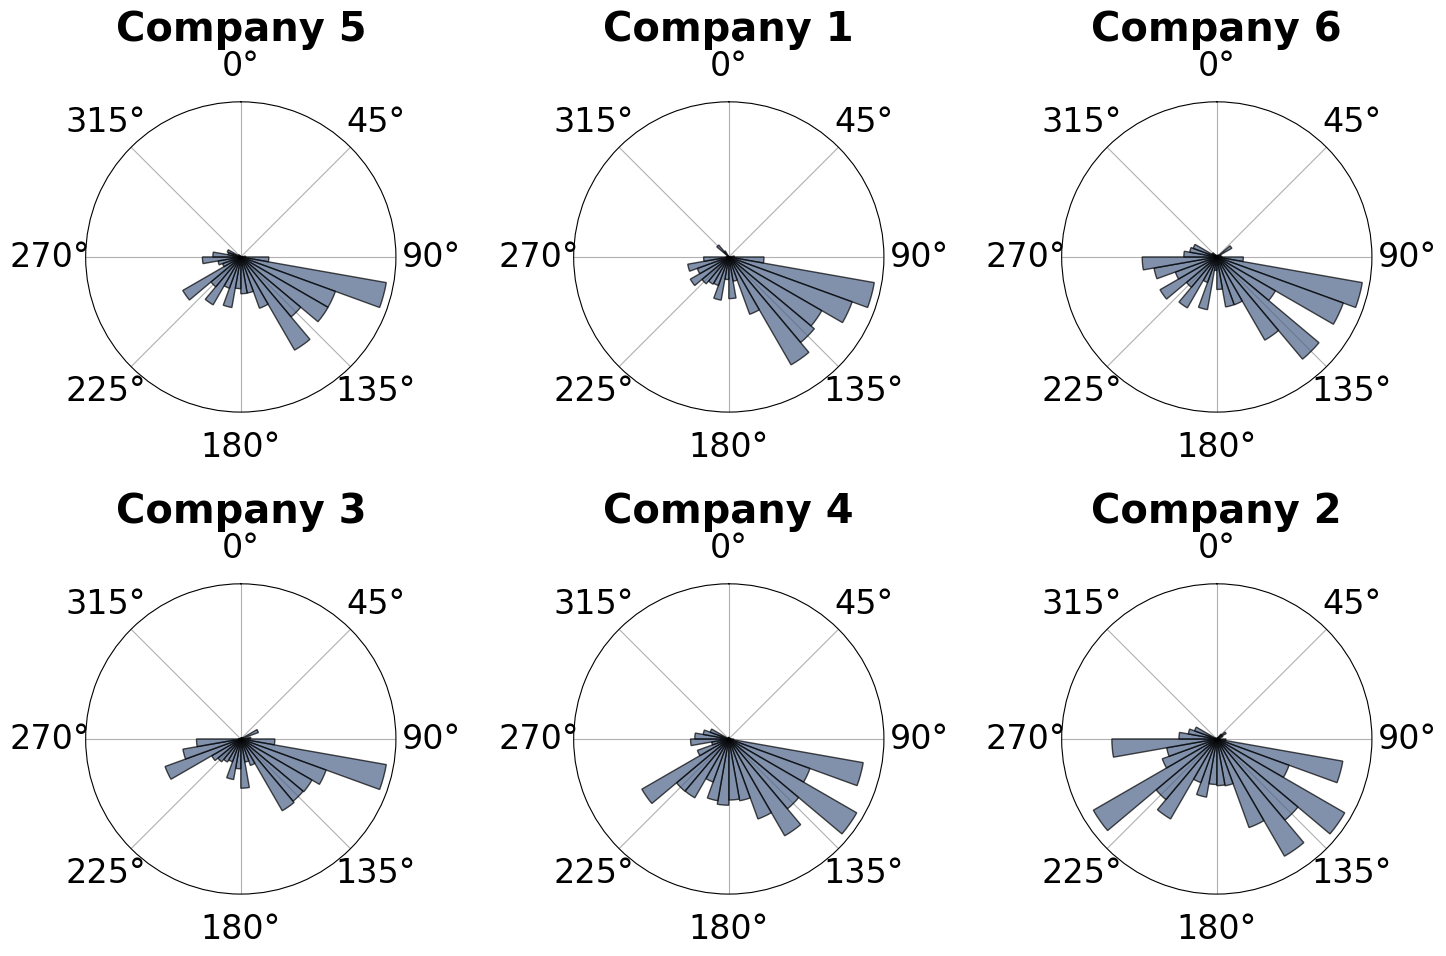

In [60]:
from scipy.cluster.hierarchy import linkage, leaves_list

# Calcular histogramas para cada empresa
histograms = {}
df = enriched_points
c = 3
r = 2
unique_companies = enriched_points["Company"].unique()
for company in unique_companies:
    company_data = df[df["Company"] == company]
    directions = company_data["direction"].dropna()
    hist, _ = np.histogram(
        directions * (np.pi / 180),
        bins=np.arange(0, 2 * np.pi + np.pi / 18, np.pi / 18),
        density=True,
    )
    histograms[company] = hist

# Calcular similaridade (correlação) entre os histogramas
similarity_matrix = np.zeros((len(unique_companies), len(unique_companies)))
for i, company1 in enumerate(unique_companies):
    for j, company2 in enumerate(unique_companies):
        similarity_matrix[i, j] = np.corrcoef(histograms[company1], histograms[company2])[0, 1]

# Ordenar empresas com base na similaridade

linkage_matrix = linkage(1 - similarity_matrix, method="average")
ordered_indices = leaves_list(linkage_matrix)[::-1]
ordered_companies = unique_companies[ordered_indices]

# Gerar os plots ordenados
fig, axes = plt.subplots(
    r, c, subplot_kw={"projection": "polar"}, figsize=(5 * c, 5 * r)
)
plt.rcParams.update({'font.size': 24})
axes = axes.flatten()

for i, company in enumerate(ordered_companies):
    ax = axes[i]
    company_data = df[df["Company"] == company]
    directions = company_data["direction"].dropna()
    ax.set_yticks([])
    ax.yaxis.grid(True)
    ax.set_xticks(np.linspace(0, 2 * np.pi, num=8, endpoint=False))
    ax.xaxis.set_tick_params(pad=15)
    ax.hist(
        directions * (np.pi / 180),
        bins=np.arange(0, 2 * np.pi + np.pi / 18, np.pi / 18),
        alpha=0.7,
        color="#4c6388",
        edgecolor="black",
    )
    ax.set_title(f"Company {company}", fontweight="bold")
    ax.set_theta_zero_location("N")
    ax.set_rlabel_position(135)
    ax.set_theta_direction(-1)
    ax.set_axisbelow(True)

plt.tight_layout()
save_plot("Company_Similarity_Ordered_Descending")
plt.show()
